# Data Cleaning

In [1]:
import pandas as pd
import numpy as np
import os
import re

In [2]:
folder_path = os.getcwd()
dataframes = {}

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)

            # Read the file line by line to capture metadata
            with open(file_path, 'r') as f:
                metadata = {}
                lines = f.readlines()

                # Extract metadata from the first rows
                for i, line in enumerate(lines):
                    if line.strip() == "":  # Stop when reaching empty lines
                        data_start_idx = i + 1
                        break
                    if i == 5:
                        result = line.split('Session",', 1)[-1]                       
                        key, value = "Session", result
                        metadata[key.strip()] = value.strip()
                    if i == 6:
                        log_date = line.split('"Log Date","', 1)[-1].split('"', 1)[0]
                        key, value = "Log Date", pd.to_datetime(log_date)
                        metadata[key.strip()] = value
                        
                        if pd.to_datetime(value).year == 2024:
                            vehicle = 'ARG24'
                        else:
                            vehicle = 'ARG23'
                        key, value = "Vehicle", vehicle
                        metadata[key.strip()] = value.strip()
                        

            # Read the data part of the CSV into a DataFrame, skipping metadata rows
            df = pd.read_csv(file_path, skiprows=list(range(data_start_idx)) + [15])
                
            # List of columns to keep
            columns_to_keep = ['Time','Motor Speed','Distance','BMS DC Voltage','G Force Lat','G Force Long','Pack DCL','Batt Temp Hi','Batt Temp Lo','INV_COMMANDTQ','Pack SOC','BMS_DCCurrent','Pack CCL']
                       
            # Method 2: Using drop to remove all columns except the desired ones
            df = df.drop(columns=[col for col in df.columns if col not in columns_to_keep])

            # Add metadata as columns
            for key, value in metadata.items():
                df[key] = value

            # Store the modified DataFrame in the dictionary
            dataframes[file_path] = df
            print(f"Processed: {file_path}")

Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG23\5-07-2023 Endurance\5-07-2023 Endurance 1.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG23\5-07-2023 Endurance\5-08-2023 Endurance 1.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG23\5-30-2023 Endurance\5-30-2023 Endurance 1.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG24\4-19-2024 Endurance\4-19-2024_endurance 1.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG24\4-19-2024 Endurance\4-19-2024_endurance 2.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG24\4-19-2024 Endurance\4-19-2024_endurance 3.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG24\4-19-2024 Endurance\4-19-2024_endurance 4.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA\ARG24\4-28-2024 Endurance\4-28-2024_endurance 1.csv
Processed: C:\Users\julia\SixSigma\SYSTEMS DATA (1)\SYSTEMS DATA

In [4]:
del dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG23\\5-07-2023 Endurance\\5-08-2023 Endurance 1.csv']

In [38]:
dfs = {}
dfs['05-07-23'] = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG23\\5-07-2023 Endurance\\5-07-2023 Endurance 1.csv']
dfs['05-30-23'] = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG23\\5-30-2023 Endurance\\5-30-2023 Endurance 1.csv']
dfs['Competition'] = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\Comp_Endurance\\Comp_Endurance.csv']
dfs['06-08-24'] = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\6-8-2024 Endurance\\6-8-2024_endurance.csv']

In [39]:
# Join together dataframes on the same day

df1 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\4-19-2024 Endurance\\4-19-2024_endurance 1.csv']
df2 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\4-19-2024 Endurance\\4-19-2024_endurance 2.csv']
df3 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\4-19-2024 Endurance\\4-19-2024_endurance 3.csv']
df4 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\4-19-2024 Endurance\\4-19-2024_endurance 4.csv']
concat_df2 = pd.concat([df1,df2,df3,df4],ignore_index=True)
timestep = concat_df2['Time'][1]-concat_df2['Time'][0]  
times = np.arange(0,len(concat_df2))*timestep
concat_df2['Time'] = times
dfs['04-19-24'] = concat_df2
# 4-19-2024
                 
df1 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\4-28-2024 Endurance\\4-28-2024_endurance 1.csv']
df2 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\4-28-2024 Endurance\\4-28-2024_endurance 2.csv']
concat_df = pd.concat([df1,df2],ignore_index=True)
timestep = concat_df['Time'][1]-concat_df['Time'][0]  
times = np.arange(0,len(concat_df))*timestep
concat_df['Time'] = times
dfs['04-28-24'] = concat_df
# 4-28-2024

df1 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\5-22-2024 Endurance\\5-22-2024_endurance 1.csv']
df2 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\5-22-2024 Endurance\\5-22-2024_endurance 2.csv']
df3 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\5-22-2024 Endurance\\5-22-2024_endurance 3.csv']
concat_df1 = pd.concat([df1,df2,df3],ignore_index=True)
timestep = concat_df1['Time'][1]-concat_df1['Time'][0]  
times = np.arange(0,len(concat_df1))*timestep
concat_df1['Time'] = times
dfs['05-22-24'] = concat_df1
#5-22-2024

df1 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\6-2-2024 Endurance\\6-2-2024_endurance 1.csv']
df2 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\6-2-2024 Endurance\\6-2-2024_endurance 2.csv']
df3 = dataframes['C:\\Users\\julia\\SixSigma\\SYSTEMS DATA (1)\\SYSTEMS DATA\\ARG24\\6-2-2024 Endurance\\6-2-2024_endurance 3.csv']
concat_df1 = pd.concat([df1,df2,df3],ignore_index=True)
timestep = concat_df1['Time'][1]-concat_df1['Time'][0]  
times = np.arange(0,len(concat_df1))*timestep
concat_df1['Time'] = times
dfs['05-02-24'] = concat_df1
#6-2-2024

In [40]:
for key in dfs.keys():
    df = dfs[key]

    # CaLculate distance if its not in there
    if 'Distance' not in df.columns:
        car = df['Vehicle'][0]
        timestep = df['Time'][1]-df['Time'][0]
        if car == 'ARG24':
            df['Distance'] = (df['Motor Speed']/3.18/60*np.pi*16*.0254*timestep).cumsum()
            df['Ground Speed'] = df['Motor Speed']/3.18/60*np.pi*16*.0254
        else:
            df['Distance'] = (df['Motor Speed']/3.91/60*np.pi*18*.0254*timestep).cumsum()
            df['Ground Speed'] = df['Motor Speed']/3.91/60*np.pi*18*.0254

    # Filter out for distance greater than 22000
    df['Distance'] = pd.to_numeric(df['Distance'])
    df = df.loc[df['Distance'] <= 22000]

In [41]:
# Ensure motor speed is greater than 500 rpm
for key in dfs.keys():
    df = dfs[key]
    df = df[df['Motor Speed'] > 500]
    dfs[key] = df

In [43]:
# Get Ideal SOC and Ideal Voltage

def ideal_SOC(x,intercept):
    slope = (intercept-5)/22
    return -1*slope*x+intercept

def ideal_voltage(x,intercept, car):
    if car == 'ARG24':
        minv = 250
        maxv = 420
    elif car == 'ARG23':
        minv = 200
        maxv = 336
    vrange = maxv - minv
    five_percent = .05*vrange+minv
    slope = (intercept - five_percent)/22
    return -1*slope*x+intercept

dfs_with_ideal = {}

for key in dfs.keys():
    df = dfs[key]
    df = df.reset_index()
    startsoc = max(df['Pack SOC'])
    startv = max(df['BMS DC Voltage'])
    car = df['Vehicle'][0]
    df['Ideal SOC'] = ideal_SOC(df['Distance']/1000,startsoc)
    df['Ideal V'] = ideal_voltage(df['Distance']/1000,startv,car)
    dfs_with_ideal[key] = df

# Initial Plots

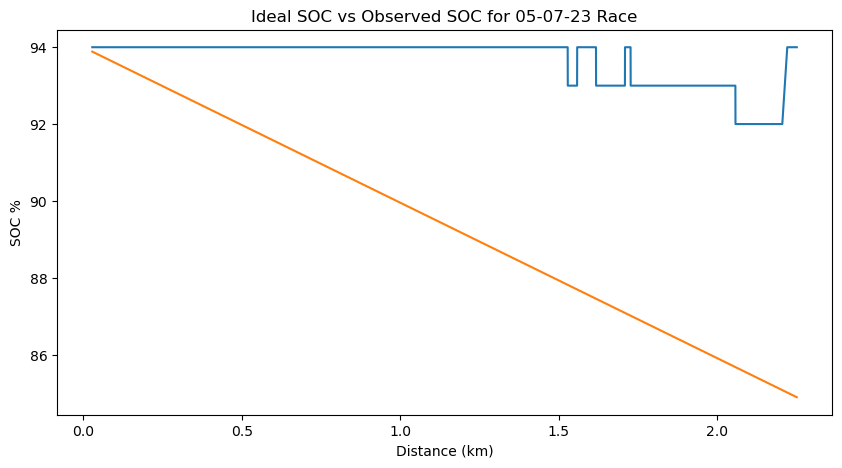

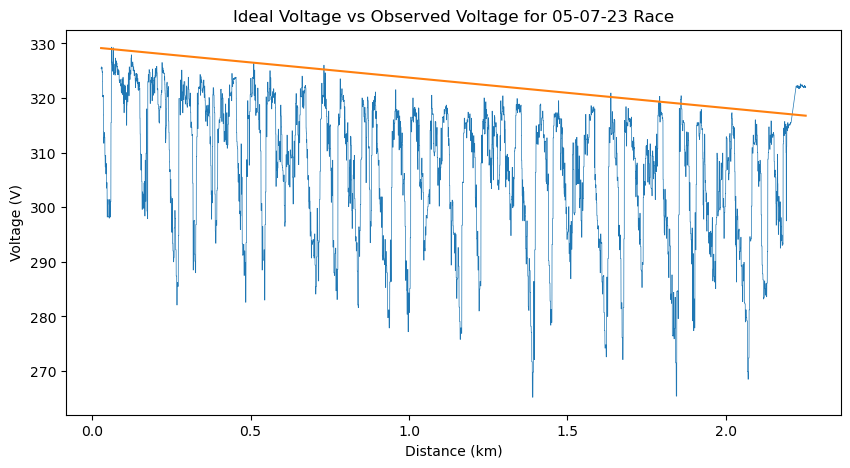

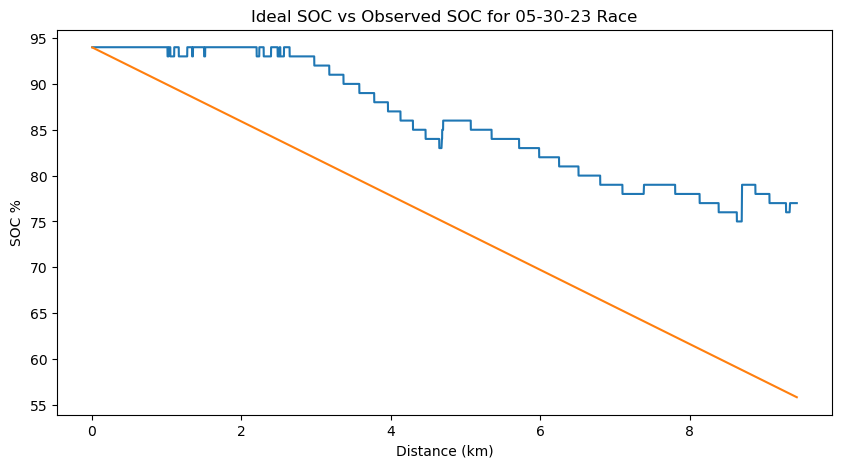

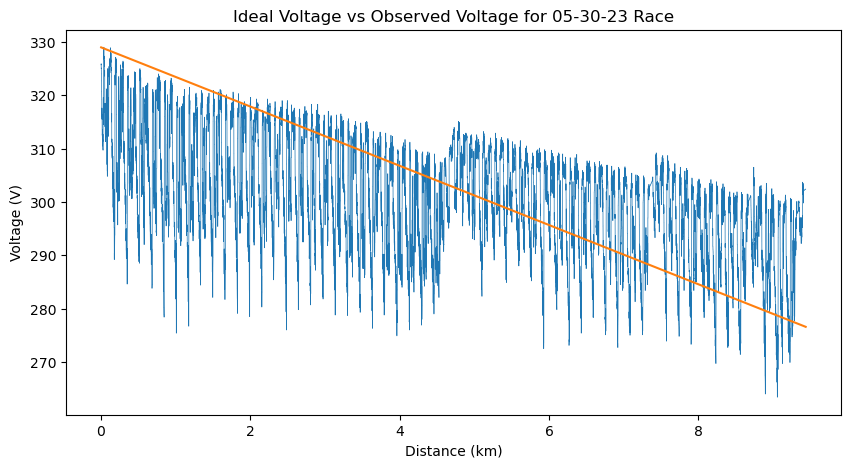

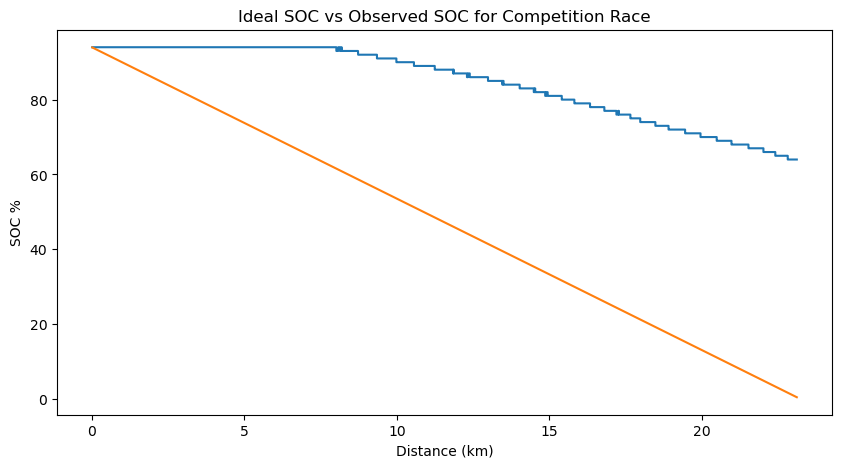

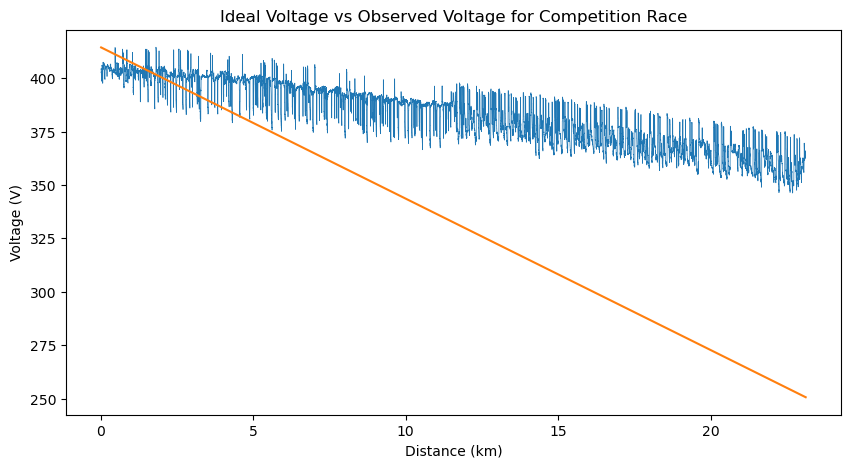

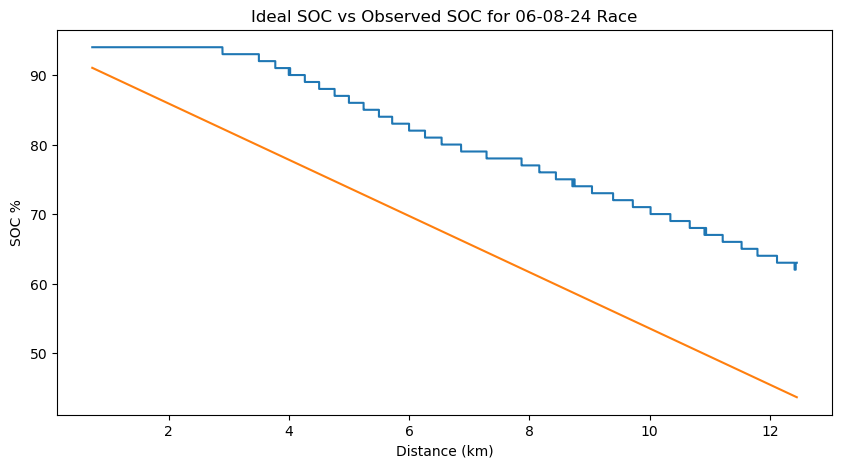

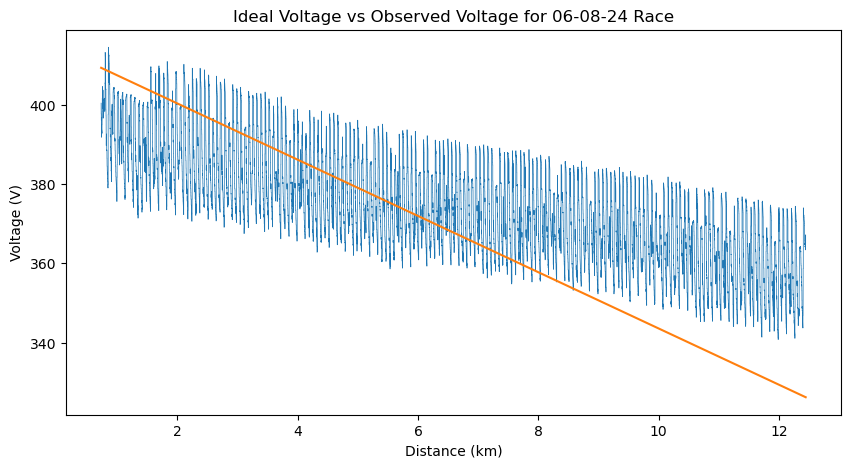

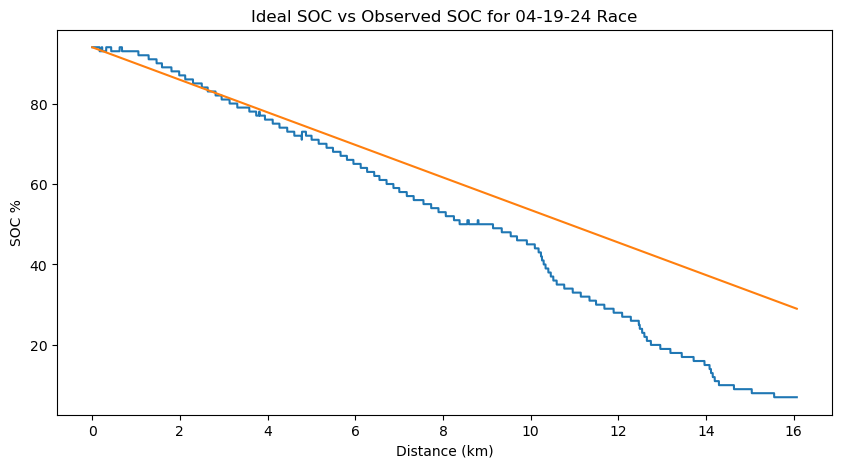

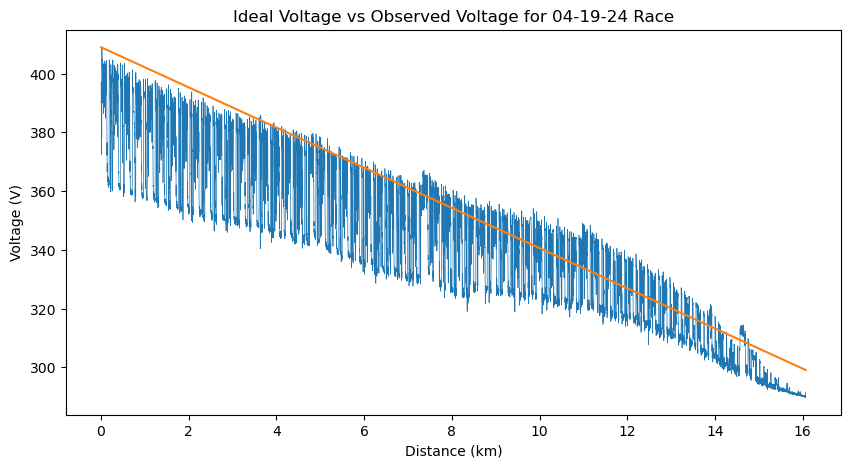

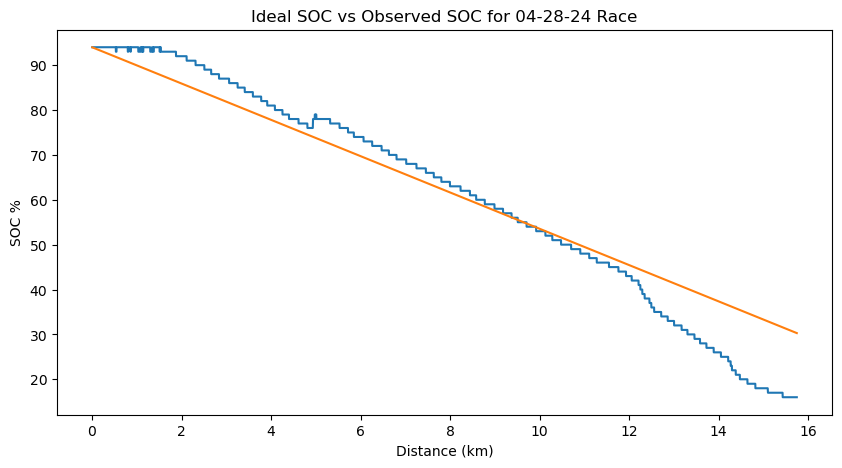

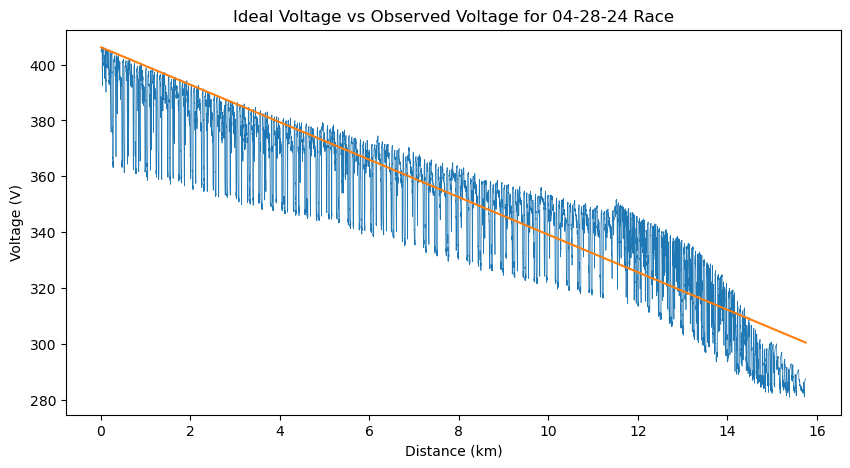

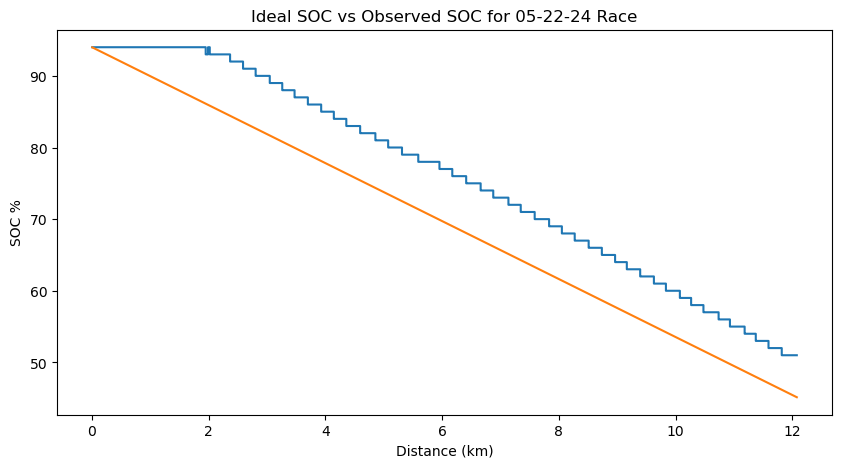

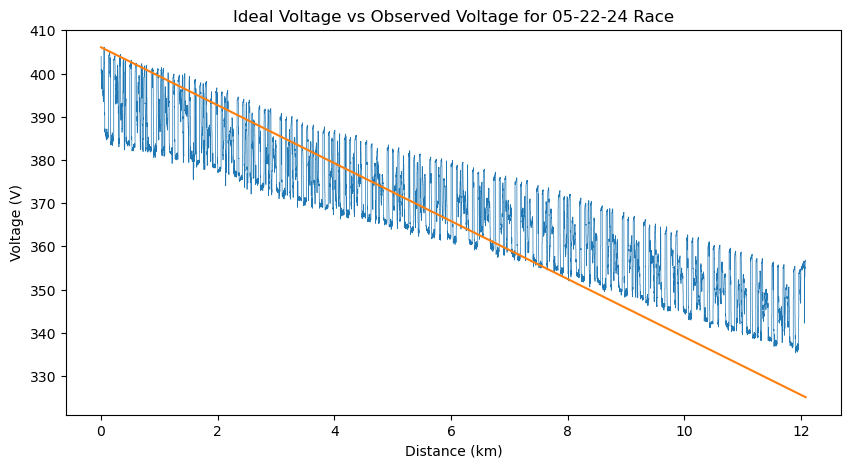

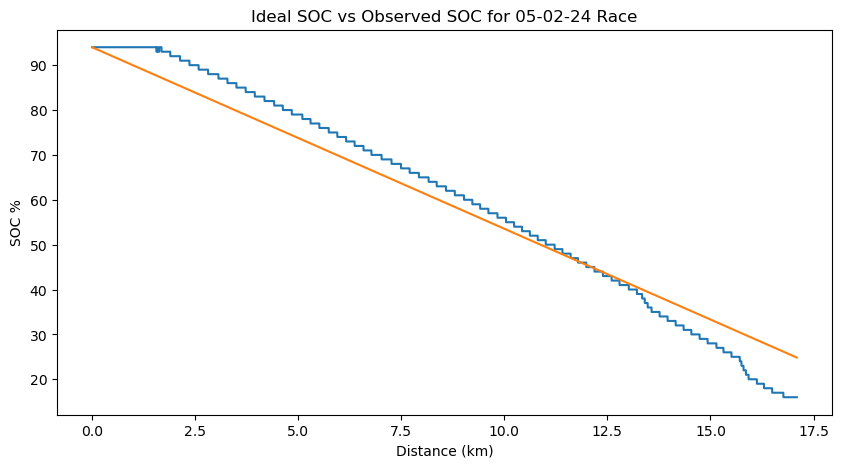

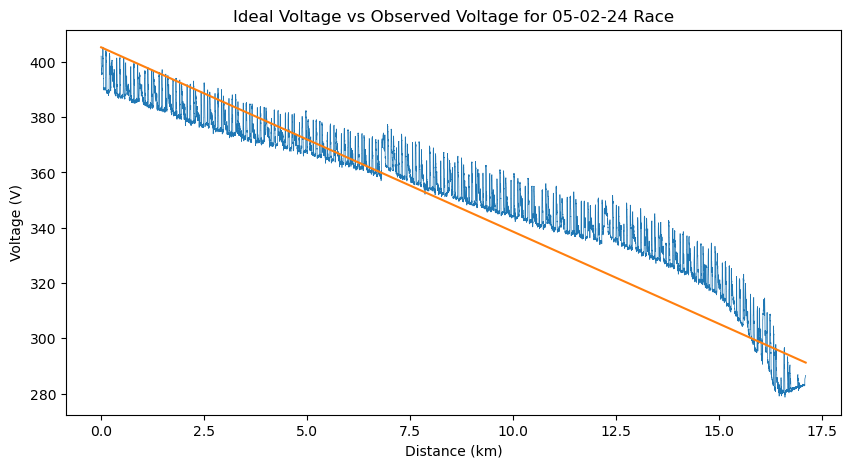

In [53]:
import matplotlib.pyplot as plt

for key in dfs_with_ideal.keys():
    df = dfs_with_ideal[key]
    plt.figure(figsize=(10,5))
    plt.plot(df['Distance']/1000, df['Pack SOC'], label='observed')
    plt.plot(df['Distance']/1000, df['Ideal SOC'], label='ideal')
    plt.xlabel('Distance (km)')
    plt.ylabel('SOC %')
    plt.title(f'Ideal SOC vs Observed SOC for {key} Race')
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(df['Distance']/1000, df['BMS DC Voltage'], label='observed',lw=.5)
    plt.plot(df['Distance']/1000, df['Ideal V'], label='ideal')
    plt.xlabel('Distance (km)')
    plt.ylabel('Voltage (V)')
    plt.title(f'Ideal Voltage vs Observed Voltage for {key} Race')
    plt.show()

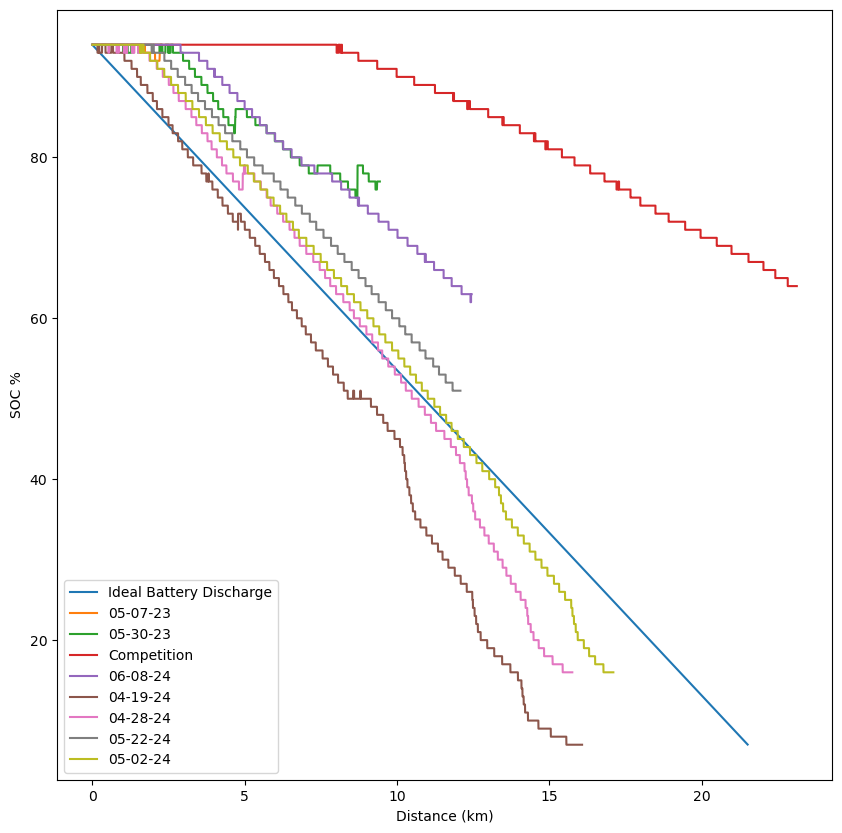

In [57]:
def ideal(x,intercept):
    slope = (intercept-5)/22
    return -1*slope*x+intercept

distance = np.arange(0,22,.5)
plt.figure(figsize=(10, 10))
plt.plot(distance,ideal(distance,94),label='Ideal Battery Discharge')

for key in dfs_with_ideal.keys():
    df = dfs_with_ideal[key]
    
    # Find the index of the first occurrence of 'i' in the key
    i_pos = key.find('_')
    
    # If 'i' is found, create a title up to the position of 'i'
    if i_pos != -1:
        title = key[:i_pos]  # Get substring up to (but not including) the position of 'i'
    else:
        title = key  # If 'i' is not found, use the entire key as the title
    
    # Plot SOC
    plt.plot(df['Distance']/1000, df['Pack SOC'], label=title)
    plt.xlabel('Distance (km)')
    plt.ylabel('SOC %')
    plt.legend(loc='lower left')  # Add a legend to the plot


# Export (Takes a long time to run)

In [42]:
def save_cleaned_dataframes(dataframes):
    for file_path, df in dataframes.items():
        # Get the directory and original filename
        directory, filename = os.path.split(file_path)
        name, ext = os.path.splitext(filename)
        
        # Create new filename with "_CLEANED" appended
        new_filename = f"{name}_CLEANED{ext}.csv"
        new_file_path = os.path.join(directory,new_filename)
        
        # Save the DataFrame to the new file path
        df.to_csv(new_file_path, index=False)
        print(f"Saved cleaned DataFrame to: {new_file_path}")

In [58]:
# Combine dataframe to have everything in one for regression!
concat_list = []
for key in dfs_with_ideal.keys():
    concat_list.append(dfs_with_ideal[key])
combined_data = pd.concat(concat_list, ignore_index=True)
dfs_with_ideal['COMBINED'] = combined_data

In [59]:
save_cleaned_dataframes(dfs_with_ideal)

Saved cleaned DataFrame to: 05-07-23_CLEANED.csv
Saved cleaned DataFrame to: 05-30-23_CLEANED.csv
Saved cleaned DataFrame to: Competition_CLEANED.csv
Saved cleaned DataFrame to: 06-08-24_CLEANED.csv
Saved cleaned DataFrame to: 04-19-24_CLEANED.csv
Saved cleaned DataFrame to: 04-28-24_CLEANED.csv
Saved cleaned DataFrame to: 05-22-24_CLEANED.csv
Saved cleaned DataFrame to: 05-02-24_CLEANED.csv
Saved cleaned DataFrame to: COMBINED_CLEANED.csv


# Get Ground speed

In [66]:
combined = dfs_with_ideal['COMBINED']

# ARG 24
combined_arg24 = combined[combined['Vehicle']=='ARG24']
combined_arg24['Ground Speed'] = combined_arg24['Motor Speed']/3.18/60*np.pi*16*.0254

# ARG 23
combined_arg23 = combined[combined['Vehicle']=='ARG23']
combined_arg23['Ground Speed'] = combined_arg23['Motor Speed']/3.91/60*np.pi*18*.0254

combined_withspeed = pd.concat([combined_arg24, combined_arg23],ignore_index=True)

dfs_newsave = {}
dfs_newsave['COMBINED_With_Ground_Speed'] = combined_withspeed
save_cleaned_dataframes(dfs_newsave)

C:\Users\julia\AppData\Local\Temp\ipykernel_10520\523180067.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_arg24['Ground Speed'] = combined_arg24['Motor Speed']/3.18/60*np.pi*16*.0254
C:\Users\julia\AppData\Local\Temp\ipykernel_10520\523180067.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_arg23['Ground Speed'] = combined_arg23['Motor Speed']/3.91/60*np.pi*18*.0254


Saved cleaned DataFrame to: COMBINED_With_Ground_Speed_CLEANED.csv
